In [1]:
from point import Point
from lattice import Lattice
from simulator import Simulator
from utils import *
import numpy as np
import matplotlib.pyplot as plt

## Lattice

### Create Lattice

`lattice = Lattice(yb_conc, tm_conc, d, r)`

yb_conc and tm_conc are yb and tm concentrations, yb_conc+tm_conc <=1. (50% concentration is 0.5). d is diameter of nanoparticle. r is critical distance where we only consider neighbors within that distance. 

In [2]:
lattice = Lattice(0.5, 0.5, 8, 0.5)

100%|██████████| 3402/3402 [00:04<00:00, 764.93it/s]


### Plots

`lattice.plot_3d_points_with_na()`: generate lattice plot with Na and Y

`lattice.plot_3d_points_with_plotly()`: generate lattice plot without Na (only Yb, Tm, Y)

`lattice.plot_distributions()`: plot the number of each type of molecules and the distribution of the energy levels of Tm and Yb.

In [3]:
lattice.plot_3d_points_with_na()

## Simulation

### Create simulator

`simulator = Simulator(lattice)`

lattice is the lattice that you want to do simulation 2. simulator creates a deep copy of the lattice, meaning that we can run two simulations on the same lattice using `simulator1 = Simulator(lattice)` and `simulator2 = Simulator(lattice)`, and the results of the two simulations will not interfere with each other.

### Plots

`simulator.show_state()`: show the current state of the lattice. Shows the 3D plot of the lattice without Na.

`simulator.plot_distribution()`: plot the distribution of the energy levels of Yb and Tm. 

### Run simulation

`simulator.step()`: run the simulation for one step. Each step is 1 microsecond. 

`simulator.simulation(t1)`: run the simulation for t1 steps.

`simulator.simulation(t1, t2)`: run the simulation for t1 steps. Then, run the simulation until t2 steps (run t2-t1 steps in addition). For the last t2-t1 steps, emission stats are collected, and the average distributions for the t2-t1 steps are plotted. This method generates an average distribution plot, and returns (nir, blue) as average emission over the last t2-t1 seconds. 

### ODE simulation

`simulator.ode_distribution()`: run the ODE numerical simulation. This method automatically plots the Tm distribution as given by the ODE. This method returns the distribution (a list of 9 elements, the first element is the number of excited Yb, the rest 8 elements are the number of Tm ions in each state N0-N7).

In [3]:
tag_default={'c0':7.025758333333333e-39, # Yb-Yb resonant energy transfer
             'c1':8.823270689202585e-42,'c2':2.824326729780273e-41,'c3':2.510909737310349e-42,'c4':2.5507997193509964e-43,
             'k31':2.0458454593341336e-41,'k41':7.299896312979955e-41,'k51':1.2897342736133983e-40,
        'Ws':1000,
        'W10':125.48935641249709,
        'W21':3.318715560788497 + 149977.8404029679,'W20':176.99746253145912 + 50.01921044404302,
        'W32':34.206376660350635 + 7.407650126658919,'W31':66.54090079350377,'W30':778.6223334161804,
        'W43':1000.49241968088766640 + 1768677.8208097615,'W42':146.53082969740504,'W41':258.72754779151234 + 58.98152867828142,'W40':1725.685918453449,
        'W54':0.013601242611778256 + 0.017876416530239997 + 156605871.04362732,'W53':5.142484506889417 + 230669.86963087242,'W52':192.81631278900016,'W51':362.10251583753916,'W50':548.8209590762159,
        'W65':12.27244074045102,'W64':10045.2434631327987160,'W63':23.045067137896037,'W62':494.8335554945873,'W61':790.6119449426245,'W60':612.1894036274351,
        'W76':95.08404006966971,'W75':686.9558866118873,'W74':488.5169554820362,'W73':2125.9773631820567,'W72':94.77917251652532,'W71':2862.4113298030165,'W70':7073.7489463917145,
        'MPR21':0,'MPR43':0,
        'laser': 5.76*10**(-5)}

simulator = Simulator(lattice)
simulator.show_state()

100%|██████████| 3402/3402 [00:04<00:00, 766.10it/s]


In [5]:
simulator = Simulator(lattice)
simulator.step()
simulator.show_state()

100%|██████████| 46/46 [00:00<00:00, 32028.22it/s]


100%|██████████| 3000/3000 [00:15<00:00, 194.70it/s]


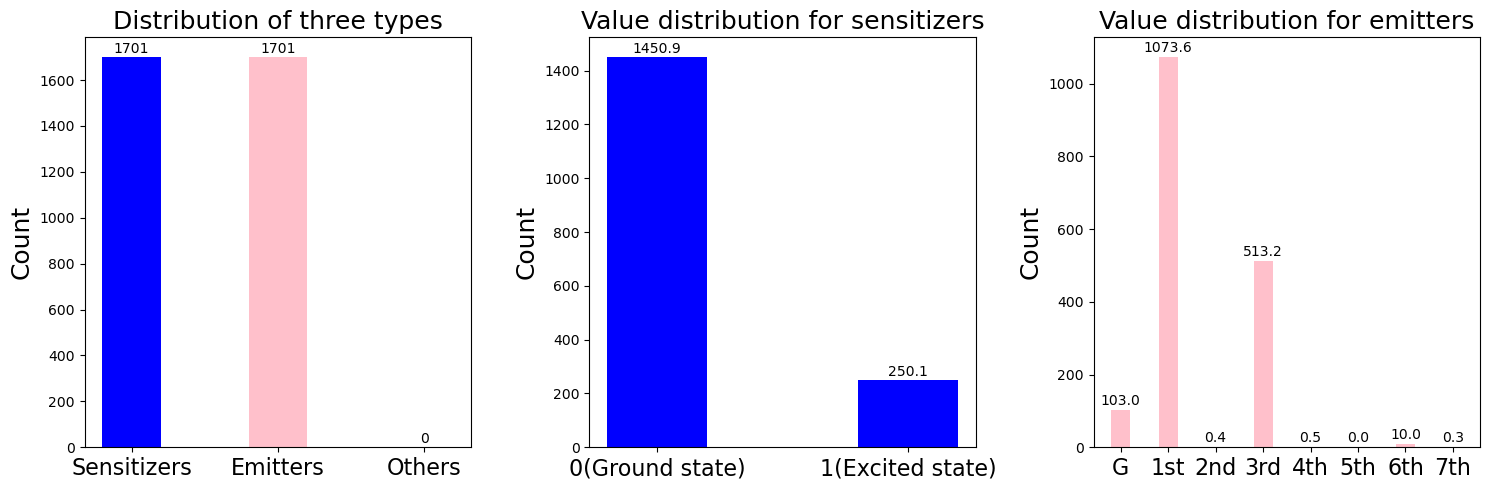

(0.4076666666666667, 0.006666666666666667)

In [4]:
simulator.simulate(3000, 6000)

In [7]:
simulator.show_state()

## Example of the complete run of a larger lattice

In [8]:
lattice_big = Lattice(0.5, 0.5, 8, 0.5)

100%|██████████| 3402/3402 [00:04<00:00, 769.78it/s]


In [9]:
simulator_big = Simulator(lattice_big)

100%|██████████| 3402/3402 [00:04<00:00, 771.60it/s]


100%|██████████| 3000/3000 [00:08<00:00, 372.59it/s]


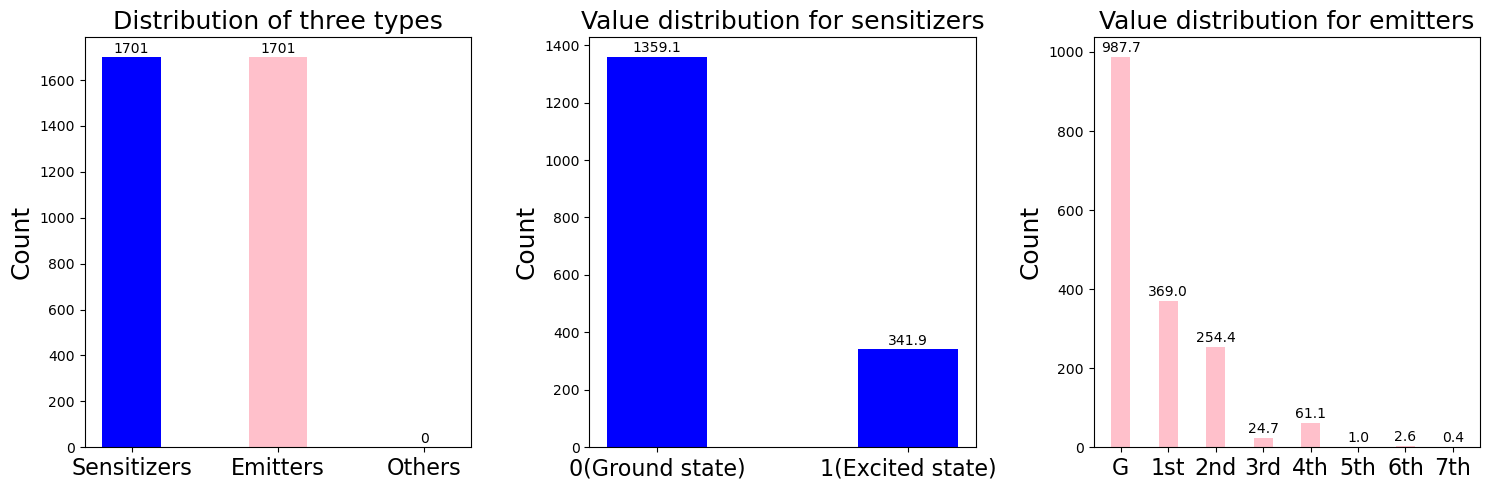

(0.028, 0.002)

In [10]:
simulator_big.simulate(3000, 6000)

In [11]:
simulator_big.show_state()

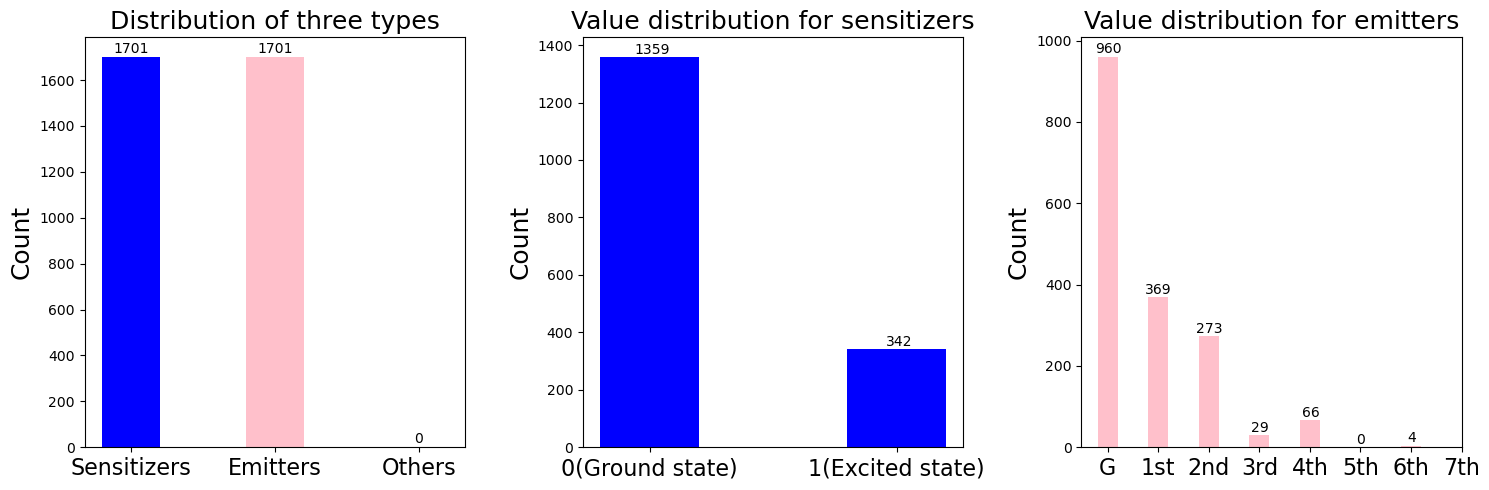

In [12]:
simulator_big.plot_distributions()

Why the ODE distribution differs from the MC distribution?

 - existence of Yb - Yb "cross relaxation" where one excited Yb transfers energy to one ground state Yb
 - boundary conditions

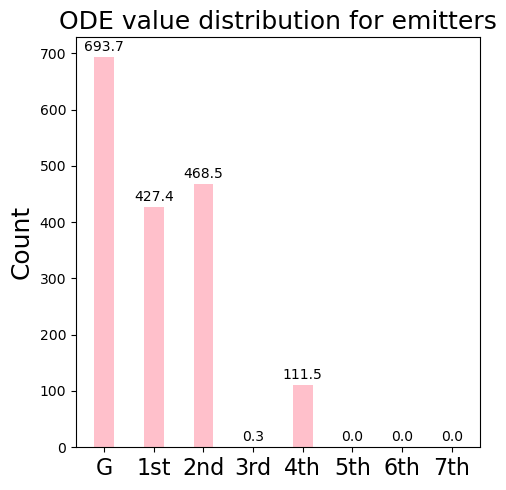

[1.5140617685064015,
 693.7043101239972,
 427.38125024656244,
 468.51055516571677,
 0.3208274526890451,
 111.4683651260081,
 0.00024130024252795753,
 0.0006911188660574864,
 1.4889366344112292e-06]

In [13]:
simulator_big.lattice.ode_distribution()

### Calculate the transition probabilities from reaction rates

We only consider how particle in excited state i leaves state i, we start with 
$$\frac{dN_i}{dt} = -\sum_j w_{ij}N_i - \sum_j k_{ij} N_iN_j$$

 - Use $\Delta t$ instead of $t$, we have $\frac{\Delta N_i}{\Delta t} = -\sum_j w_{ij}N_i - \sum_j k_{ij} N_iN_j$.
 
 Calculate $P_{leave} = - \frac{\Delta N_i}{N_i}$.

 We have $\frac{\Delta N_i}{N_i} = (-\sum_j w_{ij} -\sum_j k_{ij})\Delta t$.

 So $$P_{leave} =  (\sum_j w_{ij} +\sum_j k_{ij})\Delta t$$
 
 - Taylor expansion

 $$N_i(\Delta t) = N_i(0)\cdot e^{-(\sum_j w_{ij} +\sum_j k_{ij})\Delta t}$$
 $$P_{stay} = \frac{N_i(\Delta t)}{N_i(0)} = e^{-(\sum_j w_{ij} +\sum_j k_{ij})\Delta t}$$
 $$P_{leave} = 1-P_{stay} = 1- e^{-(\sum_j w_{ij} +\sum_j k_{ij})\Delta t} \approx (\sum_j w_{ij} +\sum_j k_{ij})\Delta t$$



Assumptions

 - only consider particles leaving state i but not states entering state i
 - $N_j$ will not change in small $\Delta t$
 - ignore 2nd order terms in Taylor expansion
